1. 데이터 가져오기
    - sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
    - diabetes의 data를 df_X에, target을 df_y에 저장해주세요.
2. 모델에 입력할 데이터 X 준비하기
    - df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
3. 모델에 예측할 데이터 y 준비하기
    - df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.
4. train 데이터와 test 데이터로 분리하기
    - X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.
5. 모델 준비하기
    - 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
    - 모델 함수를 구현해주세요.
6. 손실함수 loss 정의하기
    - 손실함수를 MSE 함수로 정의해주세요.
7. 기울기를 구하는 gradient 함수 구현하기
    - 기울기를 계산하는 gradient 함수를 구현해주세요.
8. 하이퍼 파라미터인 학습률 설정하기
    - 학습률, learning rate 를 설정해주세요
    - 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.
9. 모델 학습하기
    - 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
    - loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
    - 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.
10. test 데이터에 대한 성능 확인하기
    - test 데이터에 대한 성능을 확인해주세요.
11. 정답 데이터와 예측한 데이터 시각화하기
    - x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

# 1. 데이터셋 불러오기

In [9]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# 모델에 입력할 데이터 X, y 준비하기
X = np.array(diabetes.data)
y = np.array(diabetes.target)

데이터 확인

In [12]:
X.shape, y.shape

((442, 10), (442,))

y 데이터 분포 확인

In [13]:
y.min(), y.max(), y.mean(), y.std()

(25.0, 346.0, 152.13348416289594, 77.00574586945044)

In [14]:
# y 데이터의 min, max
min_val = y.min()
max_val = y.max()

# min-max 정규화
normalized_y = (y - min_val) / (max_val - min_val)

정규화된 y 분포 확인

In [15]:
normalized_y.min(), normalized_y.max(), normalized_y.mean(), normalized_y.std()

(0.0, 1.0, 0.39605446779718356, 0.2398932893129297)

# train / test 데이터 분리

In [16]:
import numpy as np

def custom_train_test_split(X, y, test_size=0.2, random_state=None):
    """
    학습/검증 데이터 분리

    파라미터:
    - X: 피쳐 행렬
    - y: 타겟 
    - test_size: 테스트 데이터 비율 (default: 0.2).
    - random_state: 랜덤 씨드 (default: None).

    리턴:
    - X_train, X_test: 학습/검증 데이터 행렬.
    - y_train, y_test: 학습/검증 타겟.
    """
    
    # 랜덤 씨드 설정되었을 경우
    if random_state is not None:
        np.random.seed(random_state)

    # 검증 데이터 샘플 수
    num_test_samples = int(test_size * X.shape[0])

    # 랜덤 인덱스 값
    indices = np.random.permutation(X.shape[0])

    # 랜덤 인덱스를 학습/검증 셋으로 분리
    test_indices = indices[:num_test_samples]
    train_indices = indices[num_test_samples:]

    # 랜덤 인덱스로 학습/검증 데이터 분리
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


In [17]:
# 커스텀 학습/검증 데이터 분리 함수 호출, 검증 데이터 비율 0.2, 랜덤 씨드 42
X_train, X_test, y_train, y_test = custom_train_test_split(
    X, normalized_y, test_size=0.2, random_state=42)

In [18]:
# 모델 예측
def model(X, W, b):
    predictions = 0
    for i in range(X.shape[1]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [19]:
# MSE
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [20]:
# 손실 함수
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [21]:
# 그래디언트 함수
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [24]:
LEARNING_RATE = 0.1

In [25]:
# 학습
def fit(X, y, learning_rate=0.1):
    
    # 초기화
    losses = []
    w = np.random.rand(X.shape[1])
    b = np.random.rand()
    
    # 학습: epoch 1~999
    for i in range(1, 1000):
        dw, db = gradient(X, w, b, y)
        w -= LEARNING_RATE * dw
        b -= LEARNING_RATE * db
        L = loss(X, w, b, y)
        losses.append(L)
        if i % 100 == 0:
            print(f'iteration {i} : Loss {L:0.4f}')
        
    return w, b, losses

In [26]:
# 학습 진행
W, b, losses = fit(X_train, y_train)

iteration 100 : Loss 0.0482
iteration 200 : Loss 0.0463
iteration 300 : Loss 0.0446
iteration 400 : Loss 0.0430
iteration 500 : Loss 0.0417
iteration 600 : Loss 0.0404
iteration 700 : Loss 0.0393
iteration 800 : Loss 0.0383
iteration 900 : Loss 0.0374


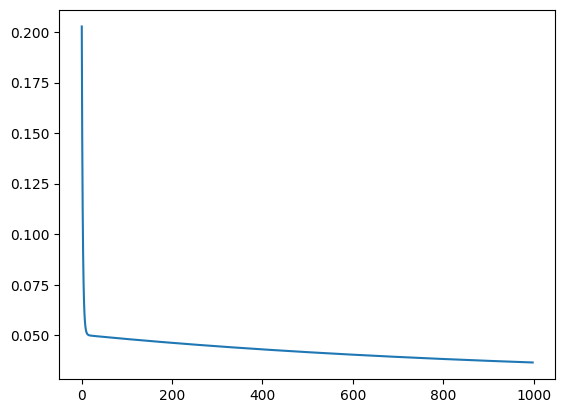

In [27]:
# 손실값 시각화
plt.plot(losses)
plt.show()

In [28]:
# 검증 데이터로 예측
y_pred = model(X_test, W, b)

In [29]:
# 검증 데이터 손실값
losses_test = loss(X_test, W, b, y_test)

In [30]:
losses_test

0.0347124131805257

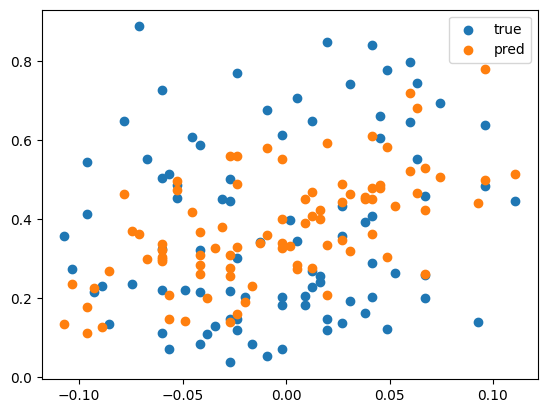

In [31]:
# 실제값, 예측값 시각화
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], y_pred, label="pred")
plt.legend()
plt.show()